# ADALINE 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining helper functions
1.Forward( ) computes output using input X and paramters (Weights and biases (Without activation) <br>
2.Update( ) updates weights and bisases in parameters using derivative of Widrow Hoff rule.<br>
3.Error is basically Square error computed by costfn( )<br>
4.init_data( ) initalizes input  ad output vectors along with weights and biases.<br>
5.Predict( ) applies activation function (Bipolar step fn) and returns answer vector)<br>

## Note : 
Stochastic gradient is applied first. As the original LMS algorithm employed this. <br>
Batch Update is moer efficient and converges faster


In [26]:
def forward(X,W,b):
    out = np.dot(W,X.T) + b
    return out
def costfn(X,Y,W,b):
    return np.sum(np.square((np.dot(W,X.T) + b)-Y))/X.shape[0]
def update(X,out,Y,alpha,W,b):
    temp = np.dot(((alpha*(Y-out))),(X));
    W = W + temp;
    temp = np.sum(alpha*(Y-out));
    b = b + temp;
    return W,temp,b
def predict(X,W,b):
    answer = np.dot(W,X.T) + b
    answer = (answer > 0).astype(int)
    for k in range(0,answer.shape[1]):
        if answer[0,k]==0:
            answer[0,k]=-1
    return answer
def init_data():
    X = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1],[-1,1,1],[-1,1,-1],[-1,-1,1],[-1,-1,-1]])
    #X = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
    #X = np.insert(X,0,1,axis = 1)
    Y = np.array([[1,1,1,1,1,1,1,-1]])
    #Y = np.array([[1,1,1,-1]])
    W = np.random.randn(1,X.shape[1])
    #W = np.array([[-0.240,0.714,-0.893]])
    b = 0
    alpha = 0.05
    return X,Y,W,alpha,b

## Stochastic gradient. 
Ignore print statements if unnecessary

In [30]:
X,Y,W,alpha,b = init_data()
print("W:",W)
print("b",b)
cost = []
for j in range(0,100):
    print("\n\n\n===============EPOCH",str(j),"===============")
    for i in range(0,X.shape[0]):
        #xin = X[i]
        xin = np.expand_dims(X[i,:],axis = 1).T
        yin = np.expand_dims(Y[0,1],axis = 0)
        yin = np.expand_dims(yin,axis = 1)
        out = forward(xin,W,b)
        costn = costfn(xin,yin,W,b)
        W,temp,b = update(xin,out,yin,alpha,W,b)
        print("X: ",xin)
        print("Updated Weights : ",W)
        print("Delta W: ",temp)
        print("Yin :",out)
        print("B:",b)
        print("T - Yin: ",(yin - out))
        print("Error",costn,"\n\n\n\n\n\n")
    cost.append(np.sum(np.square(np.dot(W,X.T)-Y)))

W: [[ 0.02795008 -0.35211457 -0.46005958]]
b 0



===============EPOCH 0 ===============
X:  [[1 1 1]]
Updated Weights :  [[ 0.11716128 -0.26290337 -0.37084838]]
Delta W:  0.08921120385970163
Yin : [[-0.78422408]]
B: 0.08921120385970163
T - Yin:  [[1.78422408]]
Error 3.1834555576388968 






X:  [[ 1  1 -1]]
Updated Weights :  [[ 0.15144541 -0.22861924 -0.40513251]]
Delta W:  0.034284125087077025
Yin : [[0.3143175]]
B: 0.12349532894677866
T - Yin:  [[0.6856825]]
Error 0.4701604931945376 






X:  [[ 1 -1  1]]
Updated Weights :  [[ 0.19652403 -0.27369787 -0.36005388]]
Delta W:  0.04507862630211347
Yin : [[0.09842747]]
B: 0.16857395524889213
T - Yin:  [[0.90157253]]
Error 0.8128330197142384 






X:  [[ 1 -1 -1]]
Updated Weights :  [[ 0.19658155 -0.27375538 -0.36011139]]
Delta W:  5.751316251013661e-05
Yin : [[0.99884974]]
B: 0.16863146841140225
T - Yin:  [[0.00115026]]
Error 1.323105544766953e-06 






X:  [[-1  1  1]]
Updated Weights :  [[ 0.1134907  -0.19066454 -0.27702055]]
Delta

Updated Weights :  [[ 0.00067555  0.00018516 -0.00022264]]
Delta W:  0.0002975501150563886
Yin : [[0.994049]]
B: 0.9959522324695734
T - Yin:  [[0.005951]]
Error 3.5414428388028044e-05 






X:  [[-1  1 -1]]
Updated Weights :  [[ 0.00045978  0.00040094 -0.00043842]]
Delta W:  0.00021577573265040286
Yin : [[0.99568449]]
B: 0.9961680082022238
T - Yin:  [[0.00431551]]
Error 1.862366672032725e-05 






X:  [[-1 -1  1]]
Updated Weights :  [[ 0.00020322  0.00014438 -0.00018186]]
Delta W:  0.0002565562052401493
Yin : [[0.99486888]]
B: 0.996424564407464
T - Yin:  [[0.00513112]]
Error 2.632843457889025e-05 






X:  [[-1 -1 -1]]
Updated Weights :  [[ 1.61612585e-05 -4.26779927e-05 -3.68921773e-04]]
Delta W:  0.00018705865205638218
Yin : [[0.99625883]]
B: 0.9966116230595203
T - Yin:  [[0.00374117]]
Error 1.399637572366026e-05 









===============EPOCH 13 ===============
X:  [[1 1 1]]
Updated Weights :  [[ 0.00020535  0.00014651 -0.00017973]]
Delta W:  0.00018919077240285855
Yin : [[0.9962

B: 0.9999884971932445
T - Yin:  [[8.28468018e-06]]
Error 6.86359256369393e-11 






X:  [[-1  1 -1]]
Updated Weights :  [[1.75671835e-06 4.88164842e-06 2.38313311e-06]]
Delta W:  6.330005761001623e-07
Yin : [[0.99998734]]
B: 0.9999891301938205
T - Yin:  [[1.26600115e-05]]
Error 1.6027589173725491e-10 






X:  [[-1 -1  1]]
Updated Weights :  [[1.00046635e-06 4.12539643e-06 3.13938511e-06]]
Delta W:  7.562519917236887e-07
Yin : [[0.99998487]]
B: 0.9999898864458122
T - Yin:  [[1.51250398e-05]]
Error 2.2876682999441846e-10 






X:  [[-1 -1 -1]]
Updated Weights :  [[8.15262509e-08 3.20645633e-06 2.22044500e-06]]
Delta W:  9.189401039610967e-07
Yin : [[0.99998162]]
B: 0.9999908053859162
T - Yin:  [[1.83788021e-05]]
Error 3.377803658672125e-10 









===============EPOCH 26 ===============
X:  [[1 1 1]]
Updated Weights :  [[2.65835576e-07 3.39076565e-06 2.40475433e-06]]
Delta W:  1.843093252129613e-07
Yin : [[0.99999631]]
B: 0.9999909896952415
T - Yin:  [[3.6861865e-06]]
Error 1.35879

T - Yin:  [[3.57569022e-08]]
Error 1.278556056149677e-15 






X:  [[ 1 -1 -1]]
Updated Weights :  [[7.19116723e-09 2.26120001e-08 1.88869546e-08]]
Delta W:  3.6877461695450365e-09
Yin : [[0.99999993]]
B: 0.9999999753038489
T - Yin:  [[7.37549234e-08]]
Error 5.4397887243976355e-15 






X:  [[-1  1  1]]
Updated Weights :  [[7.67174905e-09 2.21314183e-08 1.84063728e-08]]
Delta W:  -4.805818187847422e-10
Yin : [[1.00000001]]
B: 0.9999999748232671
T - Yin:  [[-9.61163638e-09]]
Error 9.23835538185803e-17 






X:  [[-1  1 -1]]
Updated Weights :  [[6.21557722e-09 2.35875901e-08 1.69502010e-08]]
Delta W:  1.4561718275629688e-09
Yin : [[0.99999997]]
B: 0.9999999762794389
T - Yin:  [[2.91234366e-08]]
Error 8.481745565552305e-16 






X:  [[-1 -1  1]]
Updated Weights :  [[4.38690085e-09 2.17589137e-08 1.87788774e-08]]
Delta W:  1.8286763714403521e-09
Yin : [[0.99999996]]
B: 0.9999999781081153
T - Yin:  [[3.65735274e-08]]
Error 1.3376229085857009e-15 






X:  [[-1 -1 -1]]
Updated Weights :

Yin : [[1.]]
B: 0.9999999999616098
T - Yin:  [[-1.90885752e-10]]
Error 3.643737018287722e-20 






X:  [[ 1  1 -1]]
Updated Weights :  [[2.29475462e-12 1.03177036e-10 8.67860570e-11]]
Delta W:  1.1590839399389097e-12
Yin : [[1.]]
B: 0.9999999999627689
T - Yin:  [[2.31816788e-11]]
Error 5.373902319297224e-22 






X:  [[ 1 -1  1]]
Updated Weights :  [[4.86112396e-12 1.00610667e-10 8.93524264e-11]]
Delta W:  2.5663693392630197e-12
Yin : [[1.]]
B: 0.9999999999653353
T - Yin:  [[5.13273868e-11]]
Error 2.6345006342037226e-21 






X:  [[ 1 -1 -1]]
Updated Weights :  [[1.58494564e-11 8.96223341e-11 7.83640939e-11]]
Delta W:  1.0988332466155271e-11
Yin : [[1.]]
B: 0.9999999999763236
T - Yin:  [[2.19766649e-10]]
Error 4.829738015470479e-20 






X:  [[-1  1  1]]
Updated Weights :  [[2.22724852e-11 8.31993053e-11 7.19410651e-11]]
Delta W:  -6.423028775515149e-12
Yin : [[1.]]
B: 0.9999999999699005
T - Yin:  [[-1.28460576e-10]]
Error 1.6502119460438256e-20 






X:  [[-1  1 -1]]
Updated Weig

Error 5.519914161473353e-25 









===============EPOCH 64 ===============
X:  [[1 1 1]]
Updated Weights :  [[1.19640005e-14 3.13368294e-13 2.70823175e-13]]
Delta W:  -4.271027975732978e-14
Yin : [[1.]]
B: 1.0000000000000873
T - Yin:  [[-8.54205595e-13]]
Error 7.296671987797493e-25 






X:  [[ 1  1 -1]]
Updated Weights :  [[4.88077764e-15 3.06285071e-13 2.77906398e-13]]
Delta W:  -7.083222897108499e-15
Yin : [[1.]]
B: 1.0000000000000802
T - Yin:  [[-1.41664458e-13]]
Error 2.0068818644048846e-26 






X:  [[ 1 -1  1]]
Updated Weights :  [[2.04970893e-15 3.09116140e-13 2.75075329e-13]]
Delta W:  -2.831068712794149e-15
Yin : [[1.]]
B: 1.0000000000000773
T - Yin:  [[-5.66213743e-14]]
Error 3.2059800226247683e-27 






X:  [[ 1 -1 -1]]
Updated Weights :  [[2.72906294e-14 2.83875219e-13 2.49834409e-13]]
Delta W:  2.5240920464852936e-14
Yin : [[1.]]
B: 1.0000000000001026
T - Yin:  [[5.04818409e-13]]
Error 2.5484162636521266e-25 






X:  [[-1  1  1]]
Updated Weights :  [[5.77440470e-1

Updated Weights :  [[3.01107668e-16 9.90392638e-16 8.33588547e-16]]
Delta W:  -3.33066907387547e-17
Yin : [[1.]]
B: 1.000000000000001
T - Yin:  [[-6.66133815e-16]]
Error 4.437342591868191e-31 






X:  [[-1 -1 -1]]
Updated Weights :  [[2.51147631e-16 9.40432602e-16 7.83628511e-16]]
Delta W:  4.9960036108132046e-17
Yin : [[1.]]
B: 1.000000000000001
T - Yin:  [[9.99200722e-16]]
Error 9.98402083170343e-31 









===============EPOCH 77 ===============
X:  [[1 1 1]]
Updated Weights :  [[9.57164080e-17 7.85001378e-16 6.28197288e-16]]
Delta W:  -1.5543122344752193e-16
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-3.10862447e-15]]
Error 9.663546088957395e-30 






X:  [[ 1  1 -1]]
Updated Weights :  [[4.02052568e-17 7.29490227e-16 6.83708439e-16]]
Delta W:  -5.551115123125783e-17
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-1.11022302e-15]]
Error 1.232595164407831e-30 






X:  [[ 1 -1  1]]
Updated Weights :  [[-4.20366422e-18  7.73899148e-16  6.39299518e-16]]
Delta W:  -4.44089209

T - Yin:  [[-8.8817842e-16]]
Error 7.888609052210118e-31 






X:  [[-1  1 -1]]
Updated Weights :  [[ 1.24496812e-17 -6.43192355e-17 -2.12831818e-17]]
Delta W:  -4.4408920985006264e-17
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-8.8817842e-16]]
Error 7.888609052210118e-31 






X:  [[-1 -1  1]]
Updated Weights :  [[ 5.68586021e-17 -1.99103145e-17 -6.56921028e-17]]
Delta W:  -4.4408920985006264e-17
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-8.8817842e-16]]
Error 7.888609052210118e-31 






X:  [[-1 -1 -1]]
Updated Weights :  [[ 1.01267523e-16  2.44986064e-17 -2.12831818e-17]]
Delta W:  -4.4408920985006264e-17
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-8.8817842e-16]]
Error 7.888609052210118e-31 









===============EPOCH 90 ===============
X:  [[1 1 1]]
Updated Weights :  [[ 5.68586021e-17 -1.99103145e-17 -6.56921028e-17]]
Delta W:  -4.4408920985006264e-17
Yin : [[1.]]
B: 1.0000000000000009
T - Yin:  [[-8.8817842e-16]]
Error 7.888609052210118e-31 






X:  [[ 1  1 

In [31]:
cost[-1]

7.999999999999999

In [32]:
answer = predict(X,W,b)
print("Accuracy: ",(sum(sum((answer == Y).astype(int)))/X.shape[0])*100)

Accuracy:  87.5


In [33]:
predict(X,W,b)

array([[1, 1, 1, 1, 1, 1, 1, 1]])

## Plot of cost vs iterations
This should be decreasing

Text(0.5, 1.0, 'Cost vs Iterations')

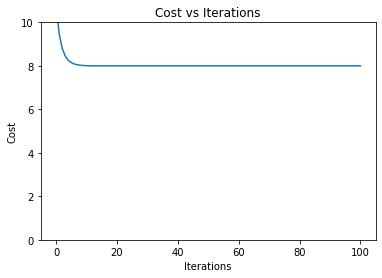

In [39]:
plt.plot(np.linspace(0,100,100),cost)
plt.ylim(0,10)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")

## Batch Update mode. 
Much faster and converges sooner

In [42]:
cost = []
X,Y,W,alpha,b = init_data()
for j in range(0,100):
        out = forward(X,W,b)
        costn = costfn(X,Y,W,b)
        W,temp,b = update(X,out,Y,alpha,W,b)
        cost.append(costn)

In [43]:
answer = predict(X,W,b)
print("Accuracy: ",(sum(sum((answer == Y).astype(int)))/X.shape[0])*100)

Accuracy:  100.0


In [44]:
cost[-1]

0.25

In [45]:
predict(X,W,b)

array([[ 1,  1,  1,  1,  1,  1,  1, -1]])

Text(0.5, 1.0, 'Cost vs Iterations')

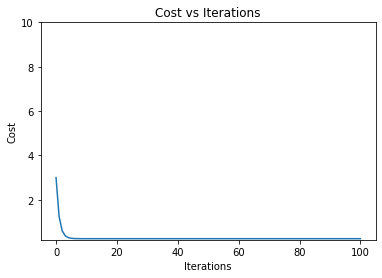

In [50]:
plt.plot(np.linspace(0,100,100),cost)
plt.ylim(0.2,10)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")

In [47]:
forward(X,W,b)

array([[ 1.50000000e+00,  1.00000000e+00,  1.00000000e+00,
         5.00000000e-01,  1.00000000e+00,  5.00000000e-01,
         5.00000000e-01, -1.11022302e-16]])

In [48]:
W

array([[0.25, 0.25, 0.25]])

In [49]:
b

0.7499999999999999